In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from mixture_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
num_features = 10
x_training = np.array([-0.9, -0.8, 0.05, 0.1, 0.15, 0.9, 0.95])
var = 0.1
X_poly, y, x_interval, y_interval, y_training = create_data(
    x_training, var, degree=num_features - 1
)
X_pred_poly = create_test_data(x_interval, degree=num_features - 1)
theta = fit_linear_regression(X_poly, y)
y_pred = X_pred_poly @ theta
nfs = get_pnml_normalization_factor(X_pred_poly, X_poly)

In [20]:
limit = 6
combs = create_subspaces_all_permutations_overparameterized(num_features, limit=limit)
U, s, _ = np.linalg.svd(X_poly.T @ X_poly, hermitian=True)
Z = np.zeros((len(combs), len(y_interval), len(x_interval)))
subspace_predictions = []

weighted_aggregation = True
for n, subspace in enumerate(combs):
    y_pred_svd, x_inv = calc_subspace_prediction(X_pred_poly, X_poly, y, U, s, subspace)
    nf = get_pnml_normalization_factor(X_pred_poly, X_poly, x_inv=x_inv)

    for i, x in enumerate(x_interval):
        mu = y_pred_svd[i].squeeze()
        var = 0.1 * nfs[i].squeeze() ** 2
        predictions = calc_gaussian_probabilities(mu, var, y_interval)
        Z[n, :, i] = (
            1 / (len(subspace)**2) * predictions if weighted_aggregation else predictions
        )

    subspace_predictions.append(y_pred_svd)

Z_avg = np.mean(Z, axis=0)

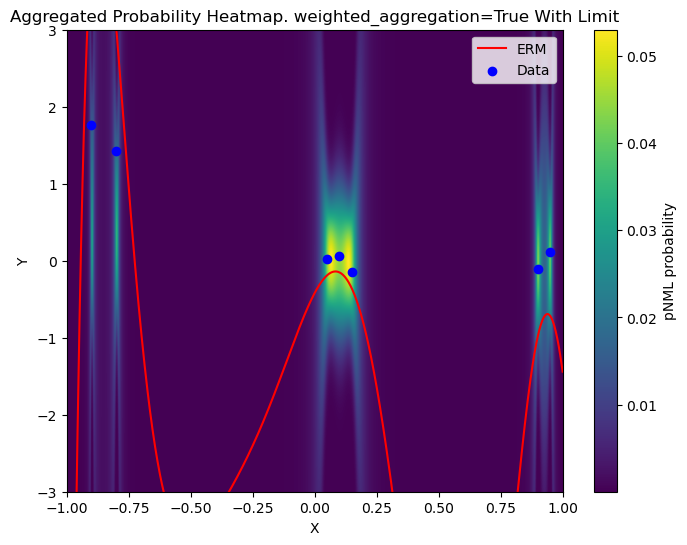

In [21]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.plot(x_interval, y_pred.squeeze(), color="red", label="ERM")
plt.scatter(x_training, y_training, color="blue", label="Data")
plt.imshow(
    Z_avg,
    extent=[x_interval[0], x_interval[-1], y_interval[0], y_interval[-1]],
    origin="lower",
    aspect="auto",
    cmap="viridis",
)
plt.colorbar(label="pNML probability")

plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Aggregated Probability Heatmap. {weighted_aggregation=} With Limit")
plt.legend()
plt.show()

In [ ]:
indices = [0, 5, 9, -5, -1]

for idx in indices:
    plt.figure(figsize=(8, 6))
    plt.imshow(
        Z[idx],
        extent=[x_interval[0], x_interval[-1], y_interval[0], y_interval[-1]],
        origin="lower",
        aspect="auto",
        cmap="viridis",
    )
    plt.plot(x_interval, subspace_predictions[idx], "k-", linewidth=2)

    plt.colorbar(label="pNML probability")
    plt.scatter(x_training, y_training, color="blue", label="Data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Probability Heatmap for subpaces={combs[idx]}")
    plt.legend()
    plt.show()

# Avg over the same pred

In [ ]:
U, s, _ = np.linalg.svd(X_poly.T @ X_poly, hermitian=True)
subspace_predictions = []

num_subspaces, hierarchies = num_features, 2
for hierarchies in range(1, num_features):
    combs = list(itertools.combinations(range(num_subspaces), hierarchies))

    Z = np.zeros((len(combs), len(y_interval), len(x_interval)))
    for n, subspace in enumerate(combs):
        print(subspace)
        subspace = [subspace[0]] if len(subspace) == 1 else subspace

        y_pred_svd, x_inv = calc_subspace_prediction(
            X_pred_poly, X_poly, y, U, s, subspace
        )
        nf = get_pnml_normalization_factor(X_pred_poly, X_poly, x_inv=x_inv)

        for i, x in enumerate(x_interval):
            mu = y_pred_svd[i].squeeze()
            var = 0.1 * nfs[i].squeeze() ** 2
            predictions = calc_gaussian_probabilities(mu, var, y_interval)
            Z[n, :, i] = predictions

    Z_avg = np.mean(Z, axis=0)
    plt.figure(figsize=(8, 6))
    plt.scatter(x_training, y_training, color="blue", label="Data")
    plt.imshow(
        Z_avg,
        extent=[x_interval[0], x_interval[-1], y_interval[0], y_interval[-1]],
        origin="lower",
        aspect="auto",
        cmap="viridis",
    )
    plt.colorbar(label="pNML probability")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Probability Heatmap. Number of hierarchies: {hierarchies}")
    plt.legend()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import itertools


num_subspaces = 4
limit = 2
combs = list(
    list(itertools.combinations(range(num_subspaces), num_comb))
    for num_comb in range(1, limit + 1)
)
combs = list(itertools.chain.from_iterable(combs))
t_combs = []
for comb in combs:
    if len(comb) == 1:
        t_combs.append([comb[0]])
    else:
        t_combs.append(comb)

In [ ]:
t_combs